# Project Title - Covid-19 Case Study (2020) 

This project consists if analysis of Covid-19 pandemic and its effect in the world. I have downloaded the dataset from kaggle and it consists of the data of covid cases till July,2020.

## Downloading the Dataset

The dataset that I am going to use in this project is from kaggle. This dataset contains details of the Covid-19 Cases in the countries in the year 2020.

The link for that dataset is [Covid-19 Worldometer](https://www.kaggle.com/imdevskp/corona-virus-report?select=worldometer_data.csv)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/imdevskp/corona-virus-report?select=worldometer_data.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: aryan2003
Your Kaggle Key: ········


100%|██████████| 19.0M/19.0M [00:00<00:00, 58.8MB/s]


The dataset has been downloaded and extracted.

In [4]:
data_dir = './corona-virus-report/'

In [5]:
import os
os.listdir(data_dir)

['worldometer_data.csv',
 'covid_19_clean_complete.csv',
 'usa_county_wise.csv',
 'country_wise_latest.csv',
 'day_wise.csv',
 'full_grouped.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-covid19-analysis" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aryanonline2003/zerotopandas-course-project-covid19-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis


'https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis'

## Data Preparation and Cleaning

Now we are going to load the csv file into a pandas dataframe from the corona-virus-report directory and explore the basic things of these datasets and try to handle missing values and incorrect values (if any). Also we will see if there is a need to add new column then we will add it.

In [10]:
import pandas as pd
import numpy as np

In [11]:
covid_df=pd.read_csv('./corona-virus-report/country_wise_latest.csv')
covid_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [12]:
covid_df.shape

(187, 15)

In [13]:
rows=covid_df.shape[0]
cols=covid_df.shape[1]
print('rows :',rows)
print('columns :',cols)

rows : 187
columns : 15


In [14]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

So, here we can see that this dataset doesn't have any null values it reduces our work a little.

This dataset contains all the numeric columns(int,float) except two columns ie Country and WHO Region.

In [15]:
covid_df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


There is very big gap between the 75% and max values which tells us that there are few countries which are suffering from the covid-19 very badly and in rest of the countries cases are not too much high.

In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aryanonline2003/zerotopandas-course-project-covid19-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis


'https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis'

## Exploratory Analysis and Visualization

In this section I am going to visualize the cases in the world and different regions through various plots using matplotlib and seaborn library of python


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [19]:
covid_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [20]:
covid_df['WHO Region'].value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO Region, dtype: int64

**TODO** - Plot the barplot depicting the top 10 countries of Americas where the total confirmed is high.

In [21]:
americas_df=covid_df[covid_df['WHO Region']=='Americas'].sort_values('Confirmed',ascending=False).head(10)
americas_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
32,Canada,116458,8944,0,107514,682,11,0,7.68,0.00,inf,112925,3533,3.13,Americas
51,Ecuador,81161,5532,34896,40733,467,17,0,6.82,43.00,15.85,74620,6541,8.77,Americas
20,Bolivia,71181,2647,21478,47056,1752,64,309,3.72,30.17,12.32,60991,10190,16.71,Americas


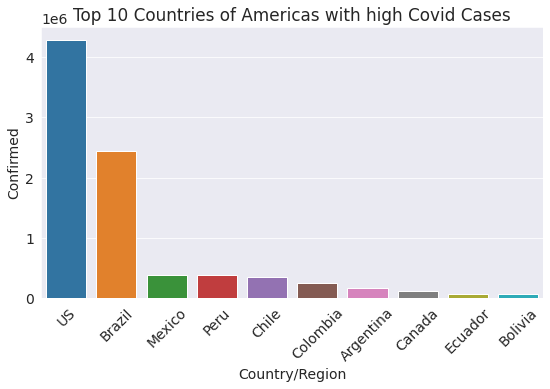

In [22]:
plt.title('Top 10 Countries of Americas with high Covid Cases')
sns.barplot(data=americas_df,x='Country/Region',y='Confirmed')
plt.xticks(rotation=45)
plt.show()

From the above graph we can see that US have very high number of covid cases and then Brazil with about half of the cases than US. Other countries have very less confirmed cases even less than 0.5 millon.

The population might be the reason for this scenario because US and Brazil are the top 2 countries with highest population in Americas and also many people from different countries visits there.

**TODO** - Plot a barplot depicting the top 5 countries with highest deaths record according to this dataset

In [23]:
top_5_deaths_countries=covid_df.sort_values('Deaths',ascending=False).head(5)
top_5_deaths_countries

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
85,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe


<AxesSubplot:title={'center':'Countries with highest deaths'}, xlabel='Country/Region', ylabel='Deaths'>

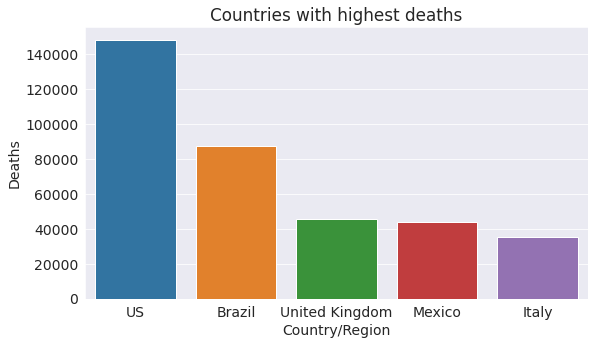

In [24]:
plt.title('Countries with highest deaths')
sns.barplot(data=top_5_deaths_countries,x='Country/Region',y='Deaths')

These countries are attractive tourist places in the world and among these countries US have the highest population so that's might be the reason for these much deaths and even the mismanagement by the government of these countries led to these much deaths. Another reason may be the low immunity of people of these countries.

**TODO** - Plot a pie chart for covid cases in all the WHO regions.

In [25]:
who_region=covid_df['WHO Region'].unique().tolist()
who_region

['Eastern Mediterranean',
 'Europe',
 'Africa',
 'Americas',
 'Western Pacific',
 'South-East Asia']

In [26]:
total_confirmed_cases=[]
for region in who_region:
    total_confirmed_cases.append(covid_df[covid_df['WHO Region']==region]['Confirmed'].sum())
total_confirmed_cases

[1490744, 3299523, 723207, 8839286, 292428, 1835297]

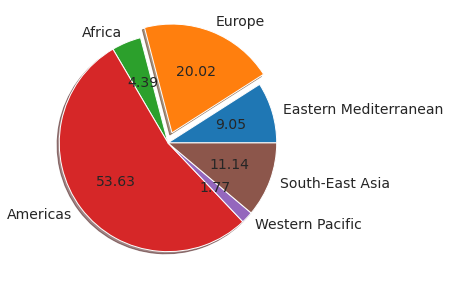

In [27]:
myexplode=[0,0.1,0,0,0,0]
plt.pie(total_confirmed_cases,labels=who_region,explode=myexplode,shadow=True,autopct='%.2f');

This pie plot depicts that more than half of the covid cases in the world is in Americas till the mid of the year 2020 and then Europe and South-East Asia. These cases are very less in Africa ad western pacific.

**TODO** - Plot graphs to compare India and US on Covid-cases.

In [28]:
america_india_df=covid_df[(covid_df['Country/Region']=='US') | (covid_df['Country/Region']=='India')].copy()
america_india_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas


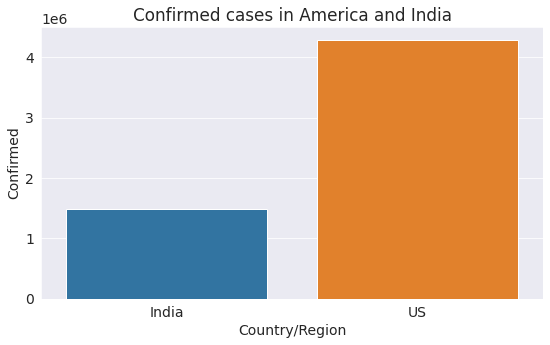

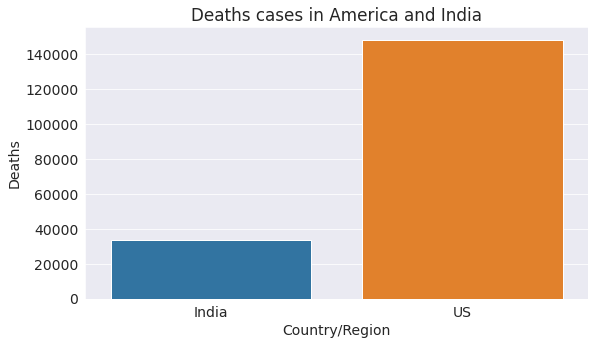

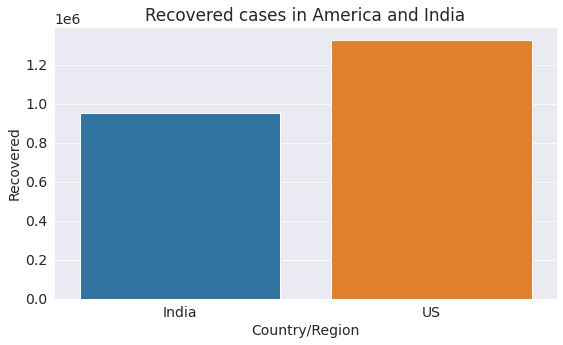

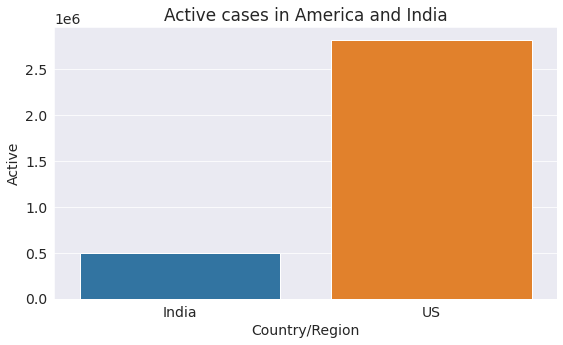

In [29]:
compare_factors=['Confirmed','Deaths','Recovered','Active']
for factor in compare_factors:
    plt.title('{} cases in America and India'.format(factor))
    sns.barplot(data=america_india_df,x='Country/Region',y=factor)
    plt.show()

So on basis of above graphs we can say that cases in India is very less as compared to US till the July,2020. Even the population of India is nearly 4 times than US and population density is also high than US , India is far better than US in covid cases. The reason might be less testing during this period in India than US. Also Deaths are very less in India than in US. This might be due to the fact that covid arises in India later than US and thus government made proper arrangements for that.

**TODO** - Top 5 Countries with New Death cases.

In [30]:
top_5_new_deaths=covid_df.sort_values('New deaths',ascending=False).head(5)
top_5_new_deaths

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
37,Colombia,257101,8777,131161,117163,16306,508,11494,3.41,51.02,6.69,204005,53096,26.03,Americas


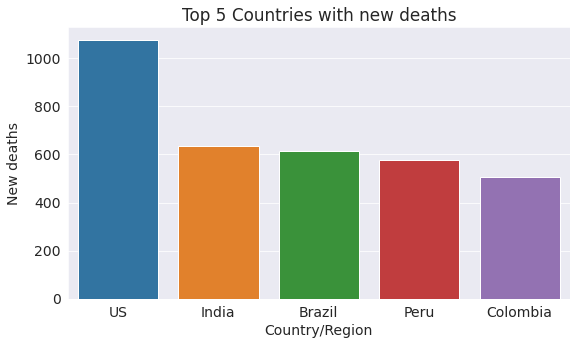

In [31]:
plt.title('Top 5 Countries with new deaths')
sns.barplot(data=top_5_new_deaths,x='Country/Region',y='New deaths');

Death cases in US is highest and rest 4 countries have death cases almost half than of US.

Check out the reason for huge deaths in US [WHY SO MUCH DEATHS IN US](https://medicalxpress.com/news/2021-02-highest-covid-death-toll.html)

Let us save and upload our work to Jovian before continuing

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aryanonline2003/zerotopandas-course-project-covid19-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis


'https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis'

## Asking and Answering Questions

I am going to ask the questions related to covid cases in the world and in different WHO regions


In [34]:
covid_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


#### Q1: Check out the recovery rate of covid patients and list out the five countries with high recovery rate.

In [35]:
recovery_df=covid_df[['Country/Region','Recovered / 100 Cases']]
recovery_df

,Country/Region,Recovered / 100 Cases
0,Afghanistan,69.49
1,Albania,56.25
2,Algeria,67.34
3,Andorra,88.53
4,Angola,25.47
...,...,...
182,West Bank and Gaza,35.33
183,Western Sahara,80.00
184,Yemen,49.26
185,Zambia,61.84


In [38]:
top_10_recoveries=recovery_df.sort_values('Recovered / 100 Cases',ascending=False).head(10)
top_10_recoveries

,Country/Region,Recovered / 100 Cases
75,Holy See,100.00
69,Grenada,100.00
49,Dominica,100.00
48,Djibouti,98.38
78,Iceland,98.33
24,Brunei,97.87
121,New Zealand,97.24
136,Qatar,97.02
105,Malaysia,96.60
110,Mauritius,96.51


As these countries doesn't suffer much due to this covid pandemic also the population is very less in these countries that's why recovery rate is very high even 100 in 3 countries.

#### Q2:  Check out the number of cases in the world from january to july.

Let us upload one more dataset from the corona-virus-report directory to check out the cases for each month.

In [41]:
raw_df=pd.read_csv('./corona-virus-report/full_grouped.csv')
raw_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [44]:
raw_df['months']=pd.to_datetime(raw_df['Date']).
raw_df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,months
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,2020-01-22
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2020-01-22
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,2020-01-22
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,2020-01-22
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,2020-01-22


In [47]:
raw_df['months'] = raw_df['months'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [48]:
raw_df

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,months
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,1
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,1
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,1
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,1
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,1
...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,7
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,7
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,7
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,7


In [59]:
month_wise_cases=raw_df.groupby('months')['Confirmed'].sum()
print(month_wise_cases.values)
print(month_wise_cases.index)

[    38534   1663437   9002815  63391662 144990399 246525787 362895848]
Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='months')


<AxesSubplot:title={'center':'Month wise cases in 2020'}, xlabel='months'>

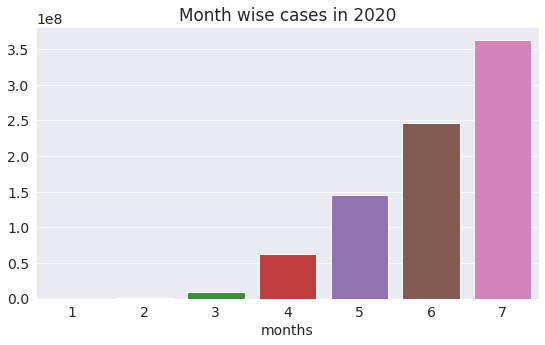

In [60]:
plt.title('Month wise cases in 2020')
sns.barplot(x=month_wise_cases.index,y=month_wise_cases.values)

Here we can see that cases were very less in the world in the starting 2-3 months of 2020 but after that we can see a sudden rise in the cases after March,2020. The reason may be the lack of awareness among people and the countries about the corona virus that time so they do not take that seriously and hence it spreaded fastly and led to the increase in cases suddenly.

#### Q3: Plot the number of deaths in july month in US

In [64]:
july_us_cases=raw_df[(raw_df.months==7) & (raw_df['Country/Region']=='US')][['Date','Deaths']]
july_us_cases

,Date,Deaths
30280,2020-07-01,128105
30467,2020-07-02,128803
30654,2020-07-03,129442
30841,2020-07-04,129689
31028,2020-07-05,129960
31215,2020-07-06,130285
31402,2020-07-07,131480
31589,2020-07-08,132300
31776,2020-07-09,133290
31963,2020-07-10,134101


<AxesSubplot:xlabel='Date', ylabel='Deaths'>

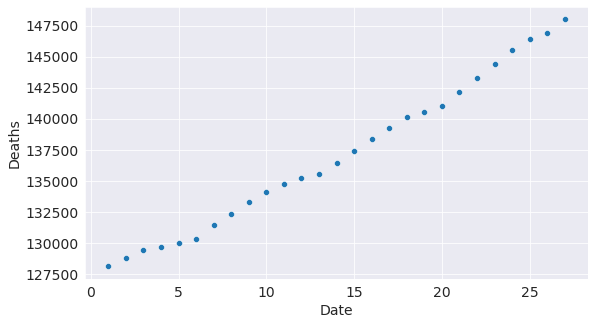

In [66]:
sns.scatterplot(x=pd.to_datetime(july_us_cases.Date).dt.day,y=july_us_cases.Deaths)

In the month of July, cases in US is increasing steeply

#### Q4: Check the situation of South-east Asia for the latest date

In [67]:
south_east_asia=covid_df[covid_df['WHO Region']=='South-East Asia']
south_east_asia

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
13,Bangladesh,226225,2965,125683,97577,2772,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia
19,Bhutan,99,0,86,13,4,0,1,0.00,86.87,0.00,90,9,10.00,South-East Asia
27,Burma,350,6,292,52,0,0,2,1.71,83.43,2.05,341,9,2.64,South-East Asia
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
80,Indonesia,100303,4838,58173,37292,1525,57,1518,4.82,58.00,8.32,88214,12089,13.70,South-East Asia
106,Maldives,3369,15,2547,807,67,0,19,0.45,75.60,0.59,2999,370,12.34,South-East Asia
119,Nepal,18752,48,13754,4950,139,3,626,0.26,73.35,0.35,17844,908,5.09,South-East Asia
158,Sri Lanka,2805,11,2121,673,23,0,15,0.39,75.61,0.52,2730,75,2.75,South-East Asia
167,Thailand,3297,58,3111,128,6,0,2,1.76,94.36,1.86,3250,47,1.45,South-East Asia
168,Timor-Leste,24,0,0,24,0,0,0,0.00,0.00,0.00,24,0,0.00,South-East Asia


In [69]:
new_cases_south_east_asia=south_east_asia[['Country/Region','New cases','New deaths','New recovered']]
new_cases_south_east_asia

,Country/Region,New cases,New deaths,New recovered
13,Bangladesh,2772,37,1801
19,Bhutan,4,0,1
27,Burma,0,0,2
79,India,44457,637,33598
80,Indonesia,1525,57,1518
106,Maldives,67,0,19
119,Nepal,139,3,626
158,Sri Lanka,23,0,15
167,Thailand,6,0,2
168,Timor-Leste,0,0,0


In [70]:
total_new_cases=new_cases_south_east_asia['New cases'].sum()
total_new_deaths=new_cases_south_east_asia['New deaths'].sum()
total_new_recovered=new_cases_south_east_asia['New recovered'].sum()

print('Situation in South-East Asia')
print('Total New Cases :',total_new_cases)
print('Total Death Cases :',total_new_deaths)
print('Total Recovered People :',total_new_recovered)

Situation in South-East Asia
Total New Cases : 48993
Total Death Cases : 734
Total Recovered People : 37582


#### Q5: Find out the percent increase in covid cases in all WHO regions.

In [80]:
region_wise_increase=covid_df.groupby('WHO Region').mean()
increase_cases=region_wise_increase['1 week % increase']
increase_cases

WHO Region
Africa                   18.086458
Americas                 16.331143
Eastern Mediterranean    10.482273
Europe                    7.769643
South-East Asia           8.513000
Western Pacific          22.111250
Name: 1 week % increase, dtype: float64

<AxesSubplot:title={'center':'% increase in cases in WHO Regions'}, xlabel='WHO Region'>

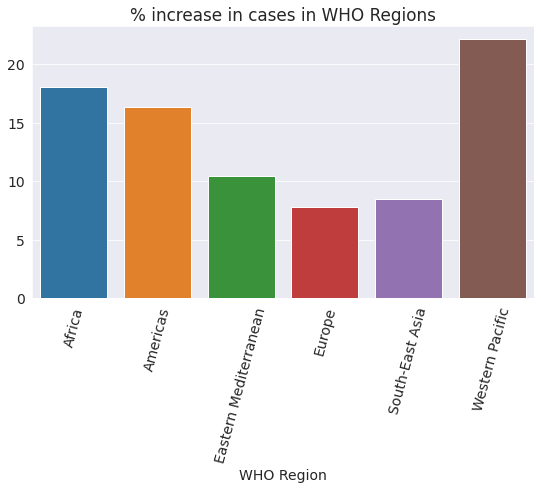

In [83]:
plt.title('% increase in cases in WHO Regions')
plt.xticks(rotation=75)
sns.barplot(x=increase_cases.index,y=increase_cases.values)

We can see the rise of covid cases in various WHO Regions since last week. Cases in Western Pacific increases faster than any other region and then Africa and Americas. This might be due to presence of China in western pacific regions which is the source of this pandemic.

Let us save and upload our work to Jovian before continuing.

In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aryanonline2003/zerotopandas-course-project-covid19-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis


'https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis'

## Inferences and Conclusion

We drew conclusion that the cases started increasing from the March,2020 steeply and led to number of deaths. Condition of US is badly affected due to this virus. Cases in all WHO region is increasing continuosly. S, there is a need of proper management and testing of the people to stop the spread of the virus.

In [86]:
import jovian

In [87]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "aryanonline2003/zerotopandas-course-project-covid19-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis


'https://jovian.ai/aryanonline2003/zerotopandas-course-project-covid19-analysis'

## References and Future Work

[WHO regions wikipedia](https://en.wikipedia.org/wiki/List_of_WHO_regions#:~:text=Western%20Pacific%20Region%20%28WPR%29%20Australia%2C%20Brunei%2C%20Cambodia%2C%20China%2C,Samoa%2C%20Singapore%2C%20Solomon%20Islands%2C%20Tonga%2C%20Tuvalu%2C%20Vanuatu%2C%20Vietnam.)

[Reason for rise in covid cases](https://www.dailysignal.com/2020/07/10/the-rise-in-covid-19-cases-explained/)

[Pie charts](https://www.w3schools.com/python/matplotlib_pie_charts.asp)

[Pandas Docs](https://pandas.pydata.org/docs/)

I used above referances for this project.

I am thinking to analyse country-wise covid condition after this project.


In [88]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>